In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
import hvplot.xarray
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import geoviews as gv
import holoviews as hv
import numpy as np
import math
from matplotlib.pyplot import figure
import pylab 
#hv.extension('bokeh')

In [2]:
ds = xr.open_dataset('/glade/work/gabyn/MARBL_spectra/remapgrid.out1.nc')

'**' January Depth Integrated '**'

In [3]:
dep = ds.z_t_150m / 100 # convert depth levels into meters. 
n = 10
nn = 12
lat = 180
lon = 360

d1c_int = np.zeros((nn,n,lat,lon)) # makes an empty file of size wanted and zeros.
d2c_int = np.zeros((nn,n,lat,lon))
d3c_int = np.zeros((nn,n,lat,lon))
diazc_int = np.zeros((nn,n,lat,lon))
ppc_int = np.zeros((nn,n,lat,lon))
mp1c_int = np.zeros((nn,n,lat,lon))
mp2c_int = np.zeros((nn,n,lat,lon))
mp3c_int = np.zeros((nn,n,lat,lon))
mp4c_int = np.zeros((nn,n,lat,lon))
zoo1c_int = np.zeros((nn,n,lat,lon))
zoo2c_int = np.zeros((nn,n,lat,lon))
zoo3c_int = np.zeros((nn,n,lat,lon))
zoo4c_int = np.zeros((nn,n,lat,lon))
zoo5c_int = np.zeros((nn,n,lat,lon))
zoo6c_int = np.zeros((nn,n,lat,lon))

for i in range(n):
    d1c_int[:,i,:,:]= ds.diat1C[:,i,:,:] * dep[i] # finds the corresponding depth level and multiplies by depth in meters.
    d2c_int[:,i,:,:]= ds.diat2C[:,i,:,:] * dep[i]
    d3c_int[:,i,:,:]= ds.diat3C[:,i,:,:] * dep[i]
    ppc_int[:,i,:,:]= ds.ppC[:,i,:,:] * dep[i]
    mp1c_int[:,i,:,:]= ds.mp1C[:,i,:,:] * dep[i]
    mp2c_int[:,i,:,:]= ds.mp2C[:,i,:,:] * dep[i]
    mp3c_int[:,i,:,:]= ds.mp3C[:,i,:,:] * dep[i]
    mp4c_int[:,i,:,:]= ds.mp4C[:,i,:,:] * dep[i]
    diazc_int[:,i,:,:]= ds.diazC[:,i,:,:] * dep[i]
    zoo1c_int[:,i,:,:]= ds.zoo1C[:,i,:,:] * dep[i]
    zoo2c_int[:,i,:,:]= ds.zoo2C[:,i,:,:] * dep[i]
    zoo3c_int[:,i,:,:]= ds.zoo3C[:,i,:,:] * dep[i]
    zoo4c_int[:,i,:,:]= ds.zoo4C[:,i,:,:] * dep[i]
    zoo5c_int[:,i,:,:]= ds.zoo5C[:,i,:,:] * dep[i]
    zoo6c_int[:,i,:,:]= ds.zoo6C[:,i,:,:] * dep[i]
     
d1c_zint = np.nansum(d1c_int, axis=1) # creates a sum of the depth levels...
d2c_zint = np.nansum(d2c_int, axis=1)
d3c_zint = np.nansum(d3c_int, axis=1)
mp1c_zint = np.nansum(mp1c_int, axis=1)
mp2c_zint = np.nansum(mp2c_int, axis=1)
mp3c_zint = np.nansum(mp3c_int, axis=1)
mp4c_zint = np.nansum(mp4c_int, axis=1)
diazc_zint = np.nansum(diazc_int, axis=1)
ppc_zint = np.nansum(ppc_int, axis=1)
zoo1c_zint = np.nansum(zoo1c_int, axis=1)
zoo2c_zint = np.nansum(zoo2c_int, axis=1)
zoo3c_zint = np.nansum(zoo3c_int, axis=1)
zoo4c_zint = np.nansum(zoo4c_int, axis=1)
zoo5c_zint = np.nansum(zoo5c_int, axis=1)
zoo6c_zint = np.nansum(zoo6c_int, axis=1)

# divide by 100m. 
d1c_clim = d1c_zint / 100 
d2c_clim = d2c_zint / 100 
d3c_clim = d3c_zint / 100 
mp1c_clim = mp1c_zint / 100 
mp2c_clim = mp2c_zint / 100 
mp3c_clim = mp3c_zint / 100 
mp4c_clim = mp4c_zint / 100 
diazc_clim = diazc_zint / 100 
ppc_clim = ppc_zint / 100 
zoo1c_clim = zoo1c_zint /100
zoo2c_clim = zoo2c_zint /100
zoo3c_clim = zoo3c_zint /100
zoo4c_clim = zoo4c_zint /100
zoo5c_clim = zoo5c_zint /100
zoo6c_clim = zoo6c_zint /100

'**' add all monts into one file '**'

In [4]:
## Chuckchi sea
d1c_cs = d1c_clim[:,150:170,0:25].mean(axis=(1,2))
d2c_cs = d2c_clim[:,150:170,0:25].mean(axis=(1,2))
d3c_cs = d3c_clim[:,150:170,0:25].mean(axis=(1,2))
mp1c_cs = mp1c_clim[:,150:170,0:25].mean(axis=(1,2))
mp2c_cs = mp2c_clim[:,150:170,0:25].mean(axis=(1,2))
mp3c_cs = mp3c_clim[:,150:170,0:25].mean(axis=(1,2))
mp4c_cs = mp4c_clim[:,150:170,0:25].mean(axis=(1,2))
ppc_cs = ppc_clim[:,150:170,0:25].mean(axis=(1,2))

diazc_cs = diazc_clim[:,150:170,0:25].mean(axis=(1,2))
zoo1c_cs = zoo1c_clim[:,150:170,0:25].mean(axis=(1,2))
zoo2c_cs = zoo2c_clim[:,150:170,0:25].mean(axis=(1,2))
zoo3c_cs = zoo3c_clim[:,150:170,0:25].mean(axis=(1,2))
zoo4c_cs = zoo4c_clim[:,150:170,0:25].mean(axis=(1,2))
zoo5c_cs = zoo5c_clim[:,150:170,0:25].mean(axis=(1,2))
zoo6c_cs = zoo6c_clim[:,150:170,0:25].mean(axis=(1,2))

cs_phyto = d1c_cs + d2c_cs + d3c_cs + mp1c_cs + mp2c_cs + mp3c_cs + mp4c_cs + ppc_cs + diazc_cs
cs_zoo = zoo1c_cs + zoo2c_cs + zoo3c_cs + zoo4c_cs + zoo5c_cs + zoo6c_cs


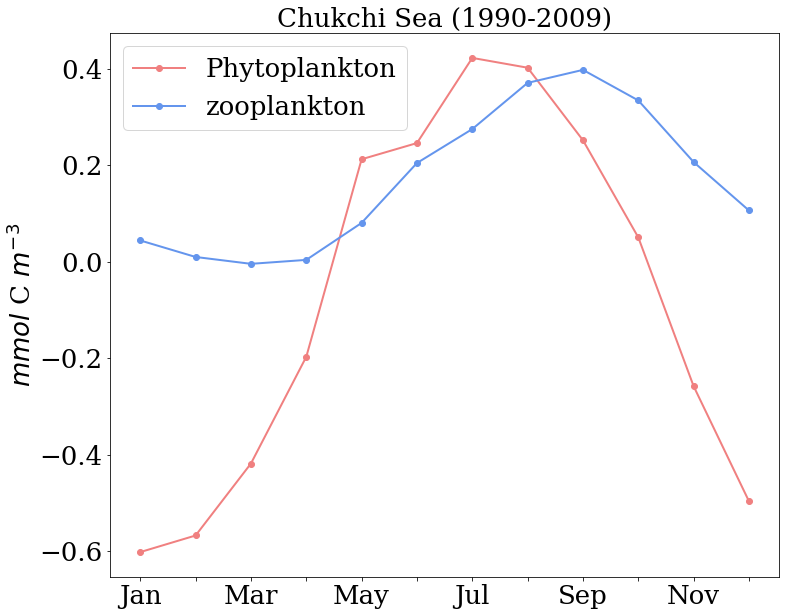

In [9]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Chukchi Sea (1990-2009)',fontsize=26,fontname='serif')

ax.plot(np.log10(cs_phyto), '-o', color='lightcoral', linewidth=2,label='Phytoplankton')
ax.plot(np.log10(cs_zoo), '-o',color='cornflowerblue', linewidth=2, label='zooplankton')
L = ax.legend(loc='upper left', fontsize=26)
plt.setp(L.texts, family='serif')

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26,fontname='serif')
plt.yticks(fontsize=26,fontname='serif')
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26,fontname='serif')
    
fig.savefig('cs_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

In [16]:
## Beaufort Sea  
d1c_bs = d1c_clim[:,150:170,25:55].mean(axis=(1,2))
d2c_bs = d2c_clim[:,150:170,25:55].mean(axis=(1,2))
d3c_bs = d3c_clim[:,150:170,25:55].mean(axis=(1,2))
mp1c_bs = mp1c_clim[:,150:170,25:55].mean(axis=(1,2))
mp2c_bs = mp2c_clim[:,150:170,25:55].mean(axis=(1,2))
mp3c_bs = mp3c_clim[:,150:170,25:55].mean(axis=(1,2))
mp4c_bs = mp4c_clim[:,150:170,25:55].mean(axis=(1,2))
ppc_bs = ppc_clim[:,150:170,25:55].mean(axis=(1,2))
diazc_bs = diazc_clim[:,150:170,25:55].mean(axis=(1,2))
zoo1c_bs = zoo1c_clim[:,150:170,25:55].mean(axis=(1,2))
zoo2c_bs = zoo2c_clim[:,150:170,25:55].mean(axis=(1,2))
zoo3c_bs = zoo3c_clim[:,150:170,25:55].mean(axis=(1,2))
zoo4c_bs = zoo4c_clim[:,150:170,25:55].mean(axis=(1,2))
zoo5c_bs = zoo5c_clim[:,150:170,25:55].mean(axis=(1,2))
zoo6c_bs = zoo6c_clim[:,150:170,25:55].mean(axis=(1,2))

bs_phyto = d1c_bs + d2c_bs + d3c_bs + mp1c_bs + mp2c_bs + mp3c_bs + mp4c_bs + ppc_bs + diazc_bs
bs_zoo = zoo1c_bs + zoo2c_bs + zoo3c_bs + zoo4c_bs + zoo5c_bs + zoo6c_bs

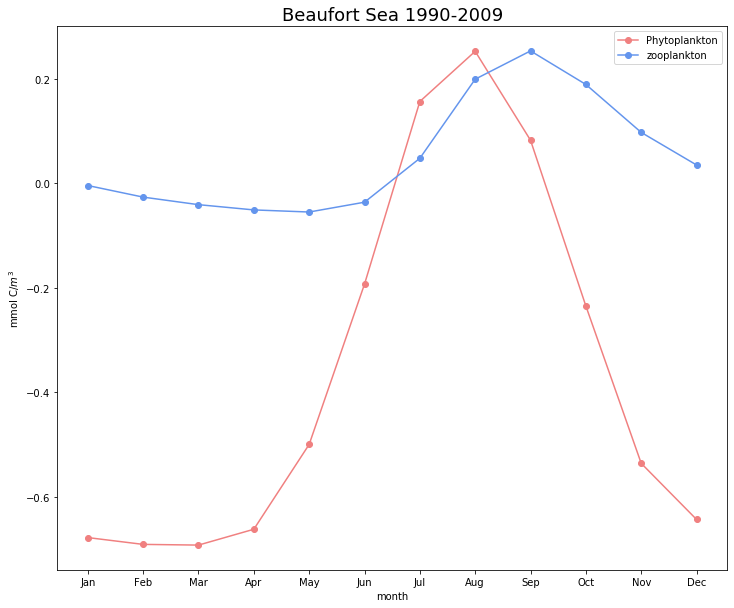

In [17]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Beaufort Sea 1990-2009',fontsize=18)

ax.plot(np.log10(bs_phyto), '-o', color='lightcoral', label='Phytoplankton')
ax.plot(np.log10(bs_zoo), '-o',color='cornflowerblue', label='zooplankton')
ax.legend(loc='upper right')

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

ax.set(xlabel='month', ylabel='mmol C/$m^3$')
ax.label_outer()
    
fig.savefig('bs_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

In [10]:
# Central Arctic
d1c_ao = d1c_clim[:,170:180,:].mean(axis=(1,2))
d2c_ao = d2c_clim[:,170:180,:].mean(axis=(1,2))
d3c_ao = d3c_clim[:,170:180,:].mean(axis=(1,2))
mp1c_ao = mp1c_clim[:,170:180,:].mean(axis=(1,2))
mp2c_ao = mp2c_clim[:,170:180,:].mean(axis=(1,2))
mp3c_ao = mp3c_clim[:,170:180,:].mean(axis=(1,2))
mp4c_ao = mp4c_clim[:,170:180,:].mean(axis=(1,2))
ppc_ao = ppc_clim[:,170:180,:].mean(axis=(1,2))
diazc_ao = diazc_clim[:,170:180,:].mean(axis=(1,2))
zoo1c_ao = zoo1c_clim[:,170:180,:].mean(axis=(1,2))
zoo2c_ao = zoo2c_clim[:,170:180,:].mean(axis=(1,2))
zoo3c_ao = zoo3c_clim[:,170:180,:].mean(axis=(1,2))
zoo4c_ao = zoo4c_clim[:,170:180,:].mean(axis=(1,2))
zoo5c_ao = zoo5c_clim[:,170:180,:].mean(axis=(1,2))
zoo6c_ao = zoo6c_clim[:,170:180,:].mean(axis=(1,2))

ao_phyto = d1c_ao + d2c_ao + d3c_ao + mp1c_ao + mp2c_ao + mp3c_ao + mp4c_ao + ppc_ao + diazc_ao
ao_zoo = zoo1c_ao + zoo2c_ao + zoo3c_ao + zoo4c_ao + zoo5c_ao + zoo6c_ao

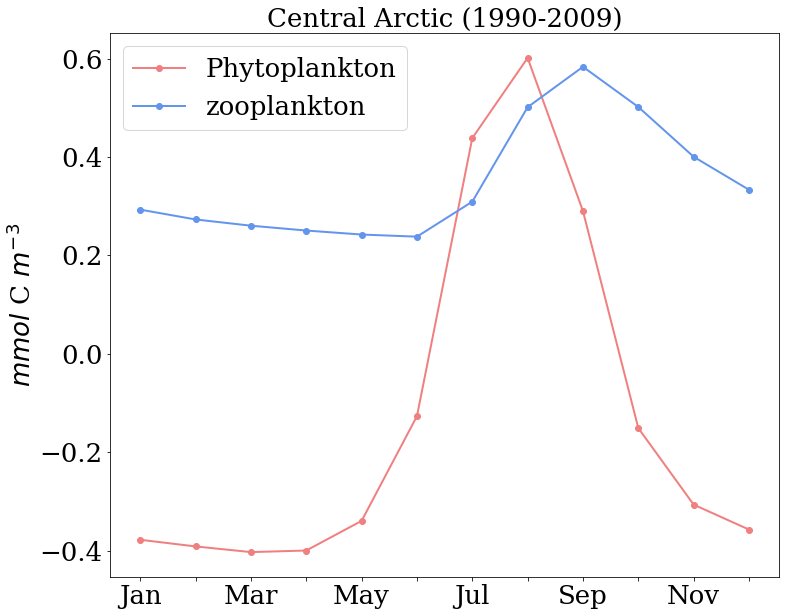

In [11]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Central Arctic (1990-2009)',fontsize=26,fontname='serif')

ax.plot(np.log10(ao_phyto), '-o', color='lightcoral', linewidth=2,label='Phytoplankton')
ax.plot(np.log10(ao_zoo), '-o',color='cornflowerblue', linewidth=2, label='zooplankton')
L = ax.legend(loc='upper left', fontsize=26)
plt.setp(L.texts, family='serif')

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26,fontname='serif')
plt.yticks(fontsize=26,fontname='serif')
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26,fontname='serif')
    
fig.savefig('ao_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

In [22]:
## Canadian Archipielago 
d1c_ca = d1c_clim[:,150:170,55:110].mean(axis=(1,2))
d2c_ca = d2c_clim[:,150:170,55:110].mean(axis=(1,2))
d3c_ca = d3c_clim[:,150:170,55:110].mean(axis=(1,2))
mp1c_ca = mp1c_clim[:,150:170,55:110].mean(axis=(1,2))
mp2c_ca = mp2c_clim[:,150:170,55:110].mean(axis=(1,2))
mp3c_ca = mp3c_clim[:,150:170,55:110].mean(axis=(1,2))
mp4c_ca = mp4c_clim[:,150:170,55:110].mean(axis=(1,2))
ppc_ca = ppc_clim[:,150:170,55:110].mean(axis=(1,2))
diazc_ca = diazc_clim[:,150:170,55:110].mean(axis=(1,2))
zoo1c_ca = zoo1c_clim[:,150:170,55:110].mean(axis=(1,2))
zoo2c_ca = zoo2c_clim[:,150:170,55:110].mean(axis=(1,2))
zoo3c_ca = zoo3c_clim[:,150:170,55:110].mean(axis=(1,2))
zoo4c_ca = zoo4c_clim[:,150:170,55:110].mean(axis=(1,2))
zoo5c_ca = zoo5c_clim[:,150:170,55:110].mean(axis=(1,2))
zoo6c_ca = zoo6c_clim[:,150:170,55:110].mean(axis=(1,2))

ca_phyto = d1c_ca + d2c_ca + d3c_ca + mp1c_ca + mp2c_ca + mp3c_ca + mp4c_ca + ppc_ca + diazc_ca
ca_zoo = zoo1c_ca + zoo2c_ca + zoo3c_ca + zoo4c_ca + zoo5c_ca + zoo6c_ca

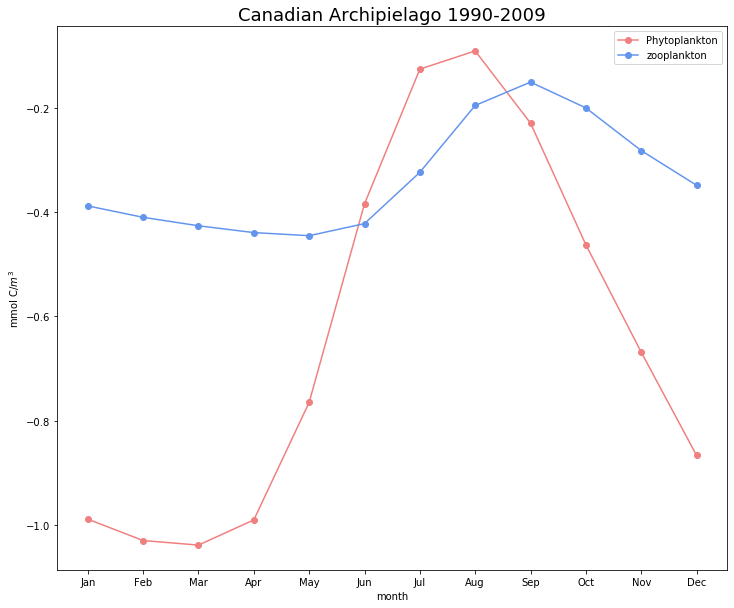

In [24]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Canadian Archipielago 1990-2009',fontsize=18)

ax.plot(np.log10(ca_phyto), '-o', color='lightcoral', label='Phytoplankton')
ax.plot(np.log10(ca_zoo), '-o',color='cornflowerblue', label='zooplankton')
ax.legend(loc='upper right')

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

ax.set(xlabel='month', ylabel='mmol C/$m^3$')
ax.label_outer()
    
fig.savefig('ca_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

In [27]:
## Baffin Sea
d1c_bb = d1c_clim[:,150:170,110:135].mean(axis=(1,2))
d2c_bb = d2c_clim[:,150:170,110:135].mean(axis=(1,2))
d3c_bb = d3c_clim[:,150:170,110:135].mean(axis=(1,2))
mp1c_bb = mp1c_clim[:,150:170,110:135].mean(axis=(1,2))
mp2c_bb = mp2c_clim[:,150:170,110:135].mean(axis=(1,2))
mp3c_bb = mp3c_clim[:,150:170,110:135].mean(axis=(1,2))
mp4c_bb = mp4c_clim[:,150:170,110:135].mean(axis=(1,2))
ppc_bb = ppc_clim[:,150:170,110:135].mean(axis=(1,2))
diazc_bb = diazc_clim[:,150:170,110:135].mean(axis=(1,2))
zoo1c_bb = zoo1c_clim[:,150:170,110:135].mean(axis=(1,2))
zoo2c_bb = zoo2c_clim[:,150:170,110:135].mean(axis=(1,2))
zoo3c_bb = zoo3c_clim[:,150:170,110:135].mean(axis=(1,2))
zoo4c_bb = zoo4c_clim[:,150:170,110:135].mean(axis=(1,2))
zoo5c_bb = zoo5c_clim[:,150:170,110:135].mean(axis=(1,2))
zoo6c_bb = zoo6c_clim[:,150:170,110:135].mean(axis=(1,2))

bb_phyto = d1c_bb + d2c_bb + d3c_bb + mp1c_bb + mp2c_bb + mp3c_bb + mp4c_bb + ppc_bb + diazc_bb
bb_zoo = zoo1c_bb + zoo2c_bb + zoo3c_bb + zoo4c_bb + zoo5c_bb + zoo6c_bb

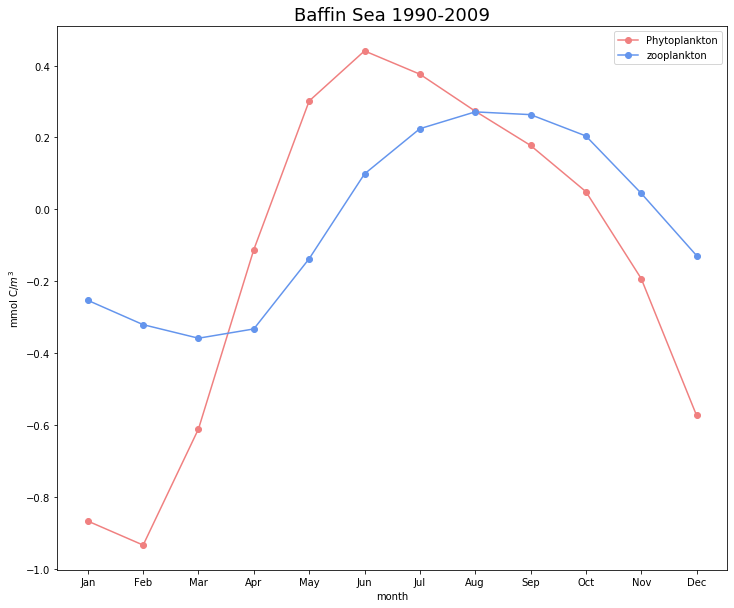

In [28]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Baffin Sea 1990-2009',fontsize=18)

ax.plot(np.log10(bb_phyto), '-o', color='lightcoral', label='Phytoplankton')
ax.plot(np.log10(bb_zoo), '-o',color='cornflowerblue', label='zooplankton')
ax.legend(loc='upper right')

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

ax.set(xlabel='month', ylabel='mmol C/$m^3$')
ax.label_outer()
    
fig.savefig('bb_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

In [29]:
## Eastern Siberian Sea
d1c_ess = d1c_clim[:,150:170,325:360].mean(axis=(1,2))
d2c_ess = d2c_clim[:,150:170,325:360].mean(axis=(1,2))
d3c_ess = d3c_clim[:,150:170,325:360].mean(axis=(1,2))
mp1c_ess = mp1c_clim[:,150:170,325:360].mean(axis=(1,2))
mp2c_ess = mp2c_clim[:,150:170,325:360].mean(axis=(1,2))
mp3c_ess = mp3c_clim[:,150:170,325:360].mean(axis=(1,2))
mp4c_ess = mp4c_clim[:,150:170,325:360].mean(axis=(1,2))
ppc_ess = ppc_clim[:,150:170,325:360].mean(axis=(1,2))
diazc_ess = diazc_clim[:,150:170,325:360].mean(axis=(1,2))
zoo1c_ess = zoo1c_clim[:,150:170,325:360].mean(axis=(1,2))
zoo2c_ess = zoo2c_clim[:,150:170,325:360].mean(axis=(1,2))
zoo3c_ess = zoo3c_clim[:,150:170,325:360].mean(axis=(1,2))
zoo4c_ess = zoo4c_clim[:,150:170,325:360].mean(axis=(1,2))
zoo5c_ess = zoo5c_clim[:,150:170,325:360].mean(axis=(1,2))
zoo6c_ess = zoo6c_clim[:,150:170,325:360].mean(axis=(1,2))

ess_phyto = d1c_ess + d2c_ess + d3c_ess + mp1c_ess + mp2c_ess + mp3c_ess + mp4c_ess + ppc_ess + diazc_ess
ess_zoo = zoo1c_ess + zoo2c_ess + zoo3c_ess + zoo4c_ess + zoo5c_ess + zoo6c_ess

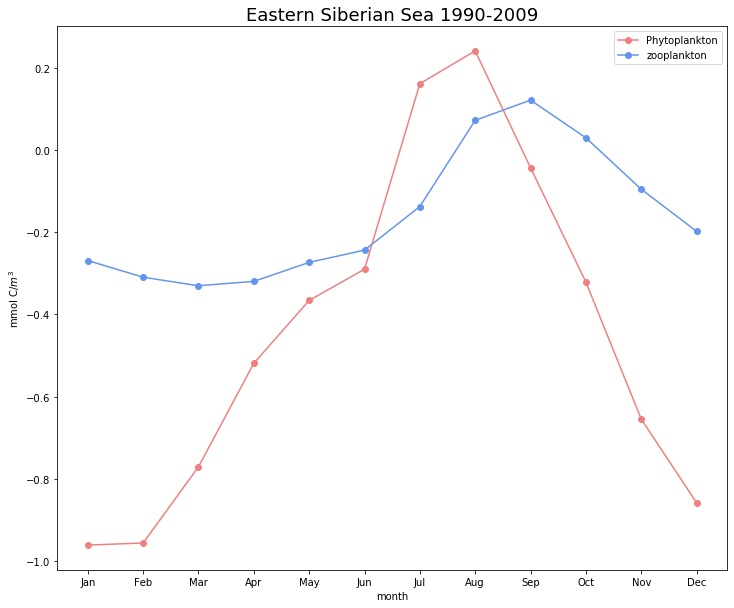

In [30]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Eastern Siberian Sea 1990-2009',fontsize=18)

ax.plot(np.log10(ess_phyto), '-o', color='lightcoral', label='Phytoplankton')
ax.plot(np.log10(ess_zoo), '-o',color='cornflowerblue', label='zooplankton')
ax.legend(loc='upper right')

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

ax.set(xlabel='month', ylabel='mmol C/$m^3$')
ax.label_outer()
    
fig.savefig('ess_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

In [12]:
## Laptev Sea
d1c_ls = d1c_clim[:,150:170,270:325].mean(axis=(1,2))
d2c_ls = d2c_clim[:,150:170,270:325].mean(axis=(1,2))
d3c_ls = d3c_clim[:,150:170,270:325].mean(axis=(1,2))
mp1c_ls = mp1c_clim[:,150:170,270:325].mean(axis=(1,2))
mp2c_ls = mp2c_clim[:,150:170,270:325].mean(axis=(1,2))
mp3c_ls = mp3c_clim[:,150:170,270:325].mean(axis=(1,2))
mp4c_ls = mp4c_clim[:,150:170,270:325].mean(axis=(1,2))
ppc_ls = ppc_clim[:,150:170,270:325].mean(axis=(1,2))
diazc_ls = diazc_clim[:,150:170,270:325].mean(axis=(1,2))
zoo1c_ls = zoo1c_clim[:,150:170,270:325].mean(axis=(1,2))
zoo2c_ls = zoo2c_clim[:,150:170,270:325].mean(axis=(1,2))
zoo3c_ls = zoo3c_clim[:,150:170,270:325].mean(axis=(1,2))
zoo4c_ls = zoo4c_clim[:,150:170,270:325].mean(axis=(1,2))
zoo5c_ls = zoo5c_clim[:,150:170,270:325].mean(axis=(1,2))
zoo6c_ls = zoo6c_clim[:,150:170,270:325].mean(axis=(1,2))

ls_phyto = d1c_ls + d2c_ls + d3c_ls + mp1c_ls + mp2c_ls + mp3c_ls + mp4c_ls + ppc_ls + diazc_ls
ls_zoo = zoo1c_ls + zoo2c_ls + zoo3c_ls + zoo4c_ls + zoo5c_ls + zoo6c_ls

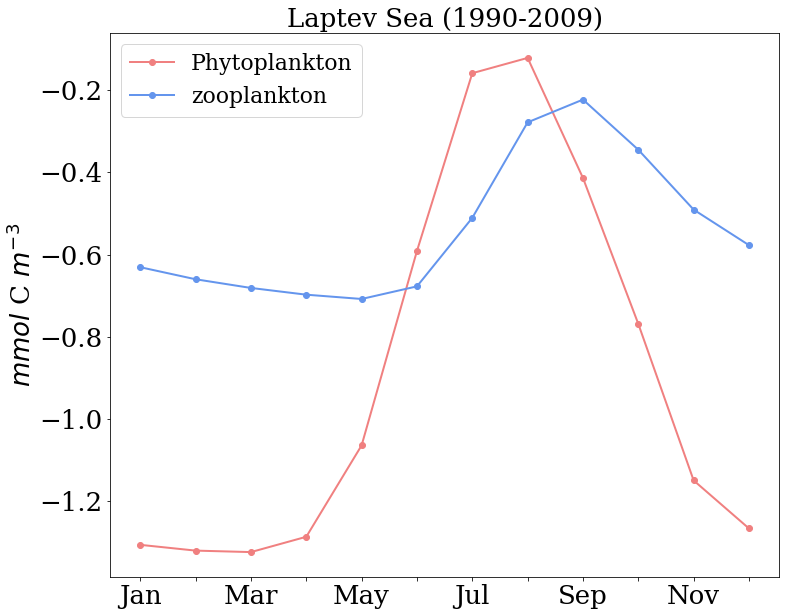

In [13]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Laptev Sea (1990-2009)',fontsize=26,fontname='serif')

ax.plot(np.log10(ls_phyto), '-o', color='lightcoral', linewidth=2,label='Phytoplankton')
ax.plot(np.log10(ls_zoo), '-o',color='cornflowerblue', linewidth=2, label='zooplankton')
L = ax.legend(loc='upper left', fontsize=22)
plt.setp(L.texts, family='serif')

plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26,fontname='serif')
plt.yticks(fontsize=26,fontname='serif')
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26,fontname='serif')
    
fig.savefig('ls_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

In [33]:
## Kara Sea
d1c_ks = d1c_clim[:,150:170,233:270].mean(axis=(1,2))
d2c_ks = d2c_clim[:,150:170,233:270].mean(axis=(1,2))
d3c_ks = d3c_clim[:,150:170,233:270].mean(axis=(1,2))
mp1c_ks = mp1c_clim[:,150:170,233:270].mean(axis=(1,2))
mp2c_ks = mp2c_clim[:,150:170,233:270].mean(axis=(1,2))
mp3c_ks = mp3c_clim[:,150:170,233:270].mean(axis=(1,2))
mp4c_ks = mp4c_clim[:,150:170,233:270].mean(axis=(1,2))
ppc_ks = ppc_clim[:,150:170,233:270].mean(axis=(1,2))
diazc_ks = diazc_clim[:,150:170,233:270].mean(axis=(1,2))
zoo1c_ks = zoo1c_clim[:,150:170,233:270].mean(axis=(1,2))
zoo2c_ks = zoo2c_clim[:,150:170,233:270].mean(axis=(1,2))
zoo3c_ks = zoo3c_clim[:,150:170,233:270].mean(axis=(1,2))
zoo4c_ks = zoo4c_clim[:,150:170,233:270].mean(axis=(1,2))
zoo5c_ks = zoo5c_clim[:,150:170,233:270].mean(axis=(1,2))
zoo6c_ks = zoo6c_clim[:,150:170,233:270].mean(axis=(1,2))

ks_phyto = d1c_ks + d2c_ks + d3c_ks + mp1c_ks + mp2c_ks + mp3c_ks + mp4c_ks + ppc_ks + diazc_ks
ks_zoo = zoo1c_ks + zoo2c_ks + zoo3c_ks + zoo4c_ks + zoo5c_ks + zoo6c_ks

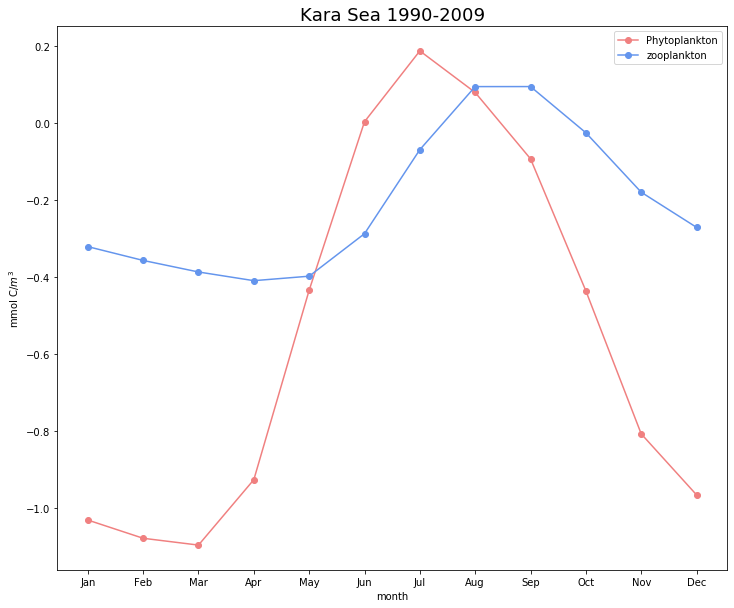

In [34]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Kara Sea 1990-2009',fontsize=18)

ax.plot(np.log10(ks_phyto), '-o', color='lightcoral', label='Phytoplankton')
ax.plot(np.log10(ks_zoo), '-o',color='cornflowerblue', label='zooplankton')
ax.legend(loc='upper right')

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

ax.set(xlabel='month', ylabel='mmol C/$m^3$')
ax.label_outer()
    
fig.savefig('ks_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

In [36]:
## Barents Sea
d1c_bts = d1c_clim[:,150:170,200:233].mean(axis=(1,2))
d2c_bts = d2c_clim[:,150:170,200:233].mean(axis=(1,2))
d3c_bts = d3c_clim[:,150:170,200:233].mean(axis=(1,2))
mp1c_bts = mp1c_clim[:,150:170,200:233].mean(axis=(1,2))
mp2c_bts = mp2c_clim[:,150:170,200:233].mean(axis=(1,2))
mp3c_bts = mp3c_clim[:,150:170,200:233].mean(axis=(1,2))
mp4c_bts = mp4c_clim[:,150:170,200:233].mean(axis=(1,2))
ppc_bts = ppc_clim[:,150:170,200:233].mean(axis=(1,2))
diazc_bts = diazc_clim[:,150:170,200:233].mean(axis=(1,2))
zoo1c_bts = zoo1c_clim[:,150:170,200:233].mean(axis=(1,2))
zoo2c_bts = zoo2c_clim[:,150:170,200:233].mean(axis=(1,2))
zoo3c_bts = zoo3c_clim[:,150:170,200:233].mean(axis=(1,2))
zoo4c_bts = zoo4c_clim[:,150:170,200:233].mean(axis=(1,2))
zoo5c_bts = zoo5c_clim[:,150:170,200:233].mean(axis=(1,2))
zoo6c_bts = zoo6c_clim[:,150:170,200:233].mean(axis=(1,2))

bts_phyto = d1c_bts + d2c_bts + d3c_bts + mp1c_bts + mp2c_bts + mp3c_bts + mp4c_bts + ppc_bts + diazc_bts
bts_zoo = zoo1c_bts + zoo2c_bts + zoo3c_bts + zoo4c_bts + zoo5c_bts + zoo6c_bts

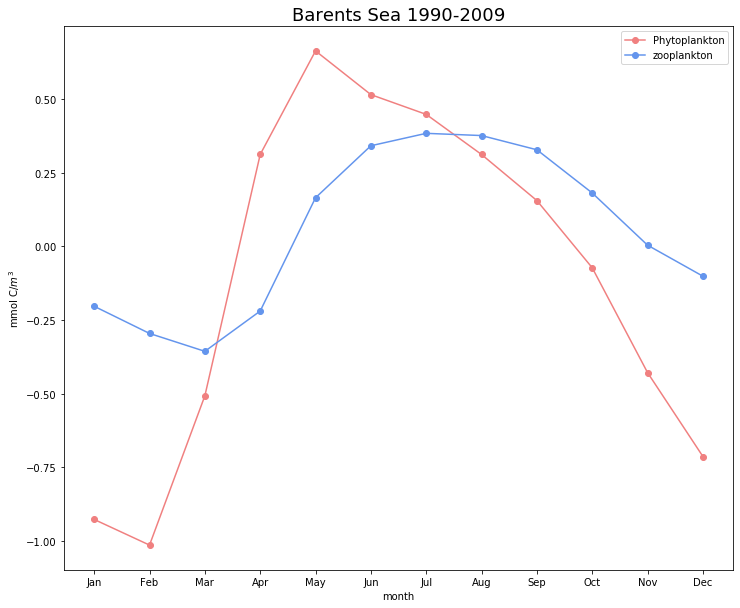

In [37]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Barents Sea 1990-2009',fontsize=18)

ax.plot(np.log10(bts_phyto), '-o', color='lightcoral', label='Phytoplankton')
ax.plot(np.log10(bts_zoo), '-o',color='cornflowerblue', label='zooplankton')
ax.legend(loc='upper right')

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

ax.set(xlabel='month', ylabel='mmol C/$m^3$')
ax.label_outer()
    
fig.savefig('bts_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

In [14]:
## Nordic Sea  
d1c_ns = d1c_clim[:,150:170,135:200].mean(axis=(1,2))
d2c_ns = d2c_clim[:,150:170,135:200].mean(axis=(1,2))
d3c_ns = d3c_clim[:,150:170,135:200].mean(axis=(1,2))
mp1c_ns = mp1c_clim[:,150:170,135:200].mean(axis=(1,2))
mp2c_ns = mp2c_clim[:,150:170,135:200].mean(axis=(1,2))
mp3c_ns = mp3c_clim[:,150:170,135:200].mean(axis=(1,2))
mp4c_ns = mp4c_clim[:,150:170,135:200].mean(axis=(1,2))
ppc_ns = ppc_clim[:,150:170,135:200].mean(axis=(1,2))
diazc_ns = diazc_clim[:,150:170,135:200].mean(axis=(1,2))
zoo1c_ns = zoo1c_clim[:,150:170,135:200].mean(axis=(1,2))
zoo2c_ns = zoo2c_clim[:,150:170,135:200].mean(axis=(1,2))
zoo3c_ns = zoo3c_clim[:,150:170,135:200].mean(axis=(1,2))
zoo4c_ns = zoo4c_clim[:,150:170,135:200].mean(axis=(1,2))
zoo5c_ns = zoo5c_clim[:,150:170,135:200].mean(axis=(1,2))
zoo6c_ns = zoo6c_clim[:,150:170,135:200].mean(axis=(1,2))

ns_phyto = d1c_ns + d2c_ns + d3c_ns + mp1c_ns + mp2c_ns + mp3c_ns + mp4c_ns + ppc_ns + diazc_ns
ns_zoo = zoo1c_ns + zoo2c_ns + zoo3c_ns + zoo4c_ns + zoo5c_ns + zoo6c_ns

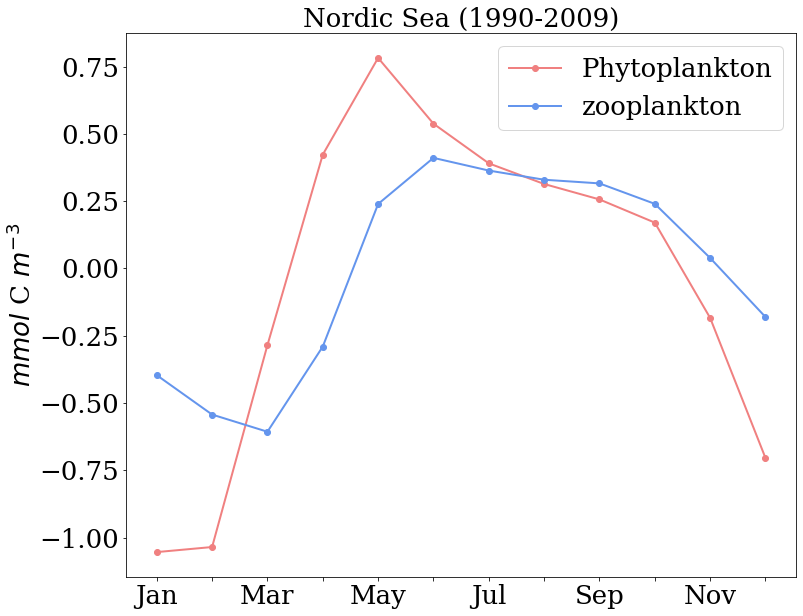

In [15]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Nordic Sea (1990-2009)',fontsize=26,fontname='serif')

ax.plot(np.log10(ns_phyto), '-o', color='lightcoral', linewidth=2,label='Phytoplankton')
ax.plot(np.log10(ns_zoo), '-o',color='cornflowerblue', linewidth=2, label='zooplankton')
L = ax.legend(loc='upper right', fontsize=26)
plt.setp(L.texts, family='serif')

plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26,fontname='serif')
plt.yticks(fontsize=26,fontname='serif')
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26,fontname='serif')
    
fig.savefig('ns_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

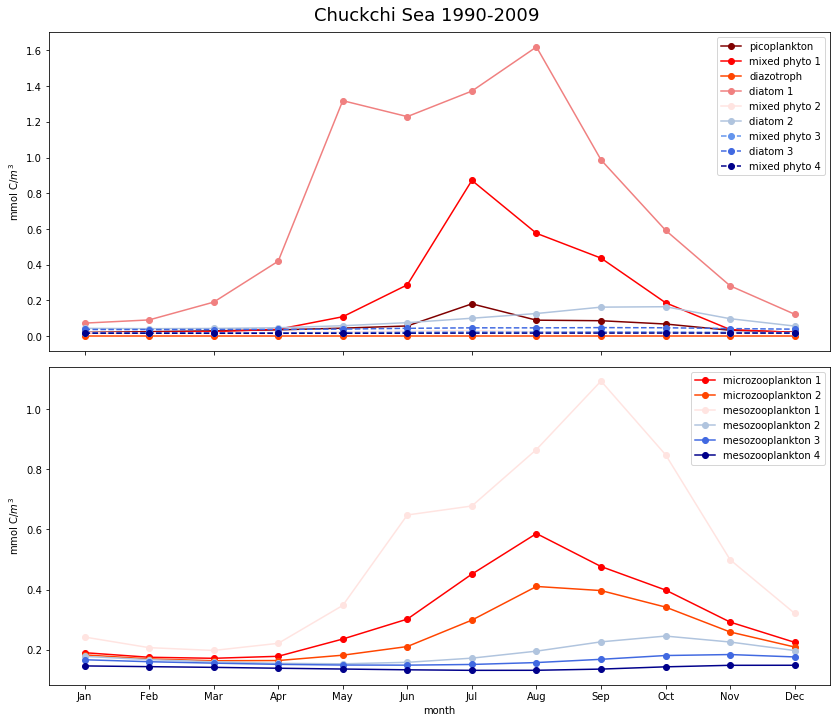

In [15]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Chuckchi Sea 1990-2009',y=0.91,fontsize=18)

axs[0].plot(ppc_cs, '-o', color='maroon', label='picoplankton')
axs[0].plot(mp1c_cs, '-o', color='red',label='mixed phyto 1')
axs[0].plot(diazc_cs, '-o', color='orangered',label='diazotroph')
axs[0].plot(d1c_cs, '-o', color='lightcoral',label='diatom 1')
axs[0].plot(mp2c_cs, '-o', color='mistyrose',label='mixed phyto 2')
axs[0].plot(d2c_cs, '-o', color='lightsteelblue',label='diatom 2')
axs[0].plot(mp3c_cs, '--o', color='cornflowerblue',label='mixed phyto 3')
axs[0].plot(d3c_cs, '--o', color='royalblue',label='diatom 3')
axs[0].plot(mp4c_cs, '--o', color='darkblue',label='mixed phyto 4')
axs[0].legend(loc='upper right')

axs[1].plot(zoo1c_cs, '-o',color='red', label='microzooplankton 1')
axs[1].plot(zoo2c_cs, '-o',color='orangered', label='microzooplankton 2')
axs[1].plot(zoo3c_cs, '-o',color='mistyrose', label='mesozooplankton 1')
axs[1].plot(zoo4c_cs, '-o',color='lightsteelblue', label='mesozooplankton 2')
axs[1].plot(zoo5c_cs, '-o',color='royalblue', label='mesozooplankton 3')
axs[1].plot(zoo6c_cs, '-o',color='darkblue', label='mesozooplankton 4')
axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

for ax in axs.flat:
    ax.set(xlabel='month', ylabel='mmol C/$m^3$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('cs_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

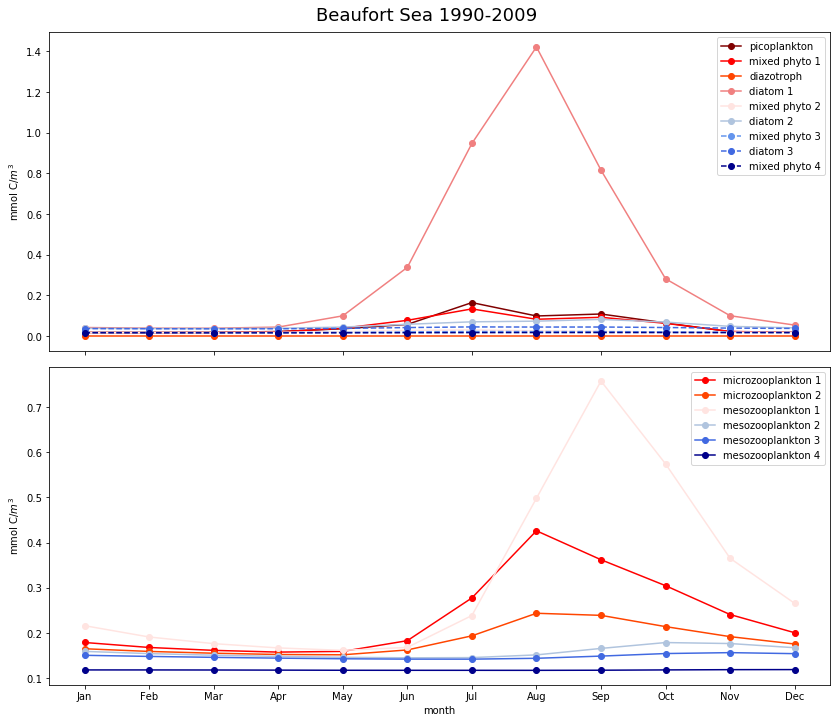

In [16]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Beaufort Sea 1990-2009',y=0.91,fontsize=18)

#fig =figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
axs[0].plot(ppc_bs, '-o', color='maroon', label='picoplankton')
axs[0].plot(mp1c_bs, '-o', color='red',label='mixed phyto 1')
axs[0].plot(diazc_bs, '-o', color='orangered',label='diazotroph')
axs[0].plot(d1c_bs, '-o', color='lightcoral',label='diatom 1')
axs[0].plot(mp2c_bs, '-o', color='mistyrose',label='mixed phyto 2')
axs[0].plot(d2c_bs, '-o', color='lightsteelblue',label='diatom 2')
axs[0].plot(mp3c_bs, '--o', color='cornflowerblue',label='mixed phyto 3')
axs[0].plot(d3c_bs, '--o', color='royalblue',label='diatom 3')
axs[0].plot(mp4c_bs, '--o', color='darkblue',label='mixed phyto 4')
axs[0].legend(loc='upper right')

axs[1].plot(zoo1c_bs, '-o',color='red', label='microzooplankton 1')
axs[1].plot(zoo2c_bs, '-o',color='orangered', label='microzooplankton 2')
axs[1].plot(zoo3c_bs, '-o',color='mistyrose', label='mesozooplankton 1')
axs[1].plot(zoo4c_bs, '-o',color='lightsteelblue', label='mesozooplankton 2')
axs[1].plot(zoo5c_bs, '-o',color='royalblue', label='mesozooplankton 3')
axs[1].plot(zoo6c_bs, '-o',color='darkblue', label='mesozooplankton 4')
axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

for ax in axs.flat:
    ax.set(xlabel='month', ylabel='mmol C/$m^3$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('bs_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

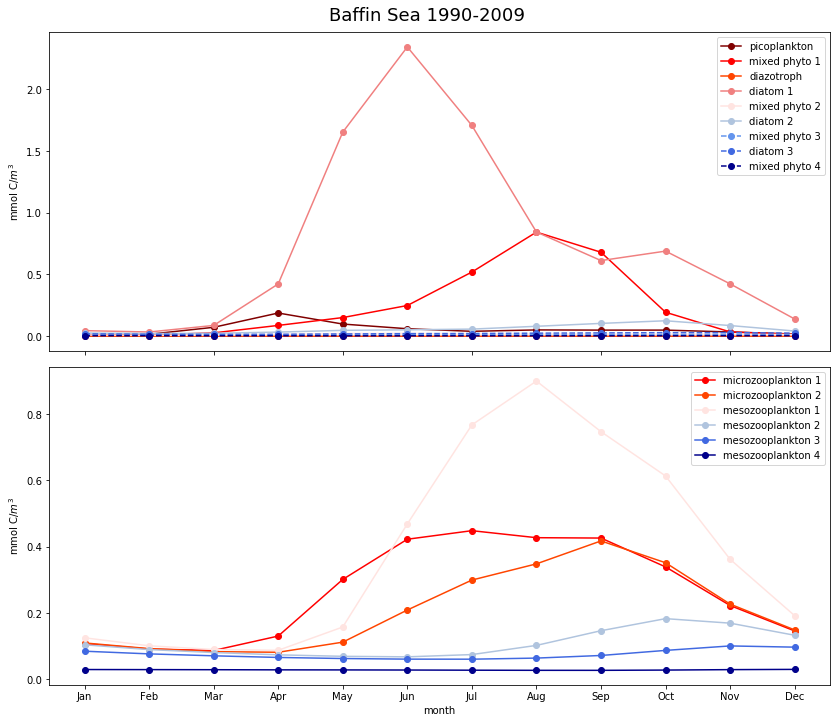

In [17]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Baffin Sea 1990-2009',y=0.91,fontsize=18)

axs[0].plot(ppc_bb, '-o', color='maroon', label='picoplankton')
axs[0].plot(mp1c_bb, '-o', color='red',label='mixed phyto 1')
axs[0].plot(diazc_bb, '-o', color='orangered',label='diazotroph')
axs[0].plot(d1c_bb, '-o', color='lightcoral',label='diatom 1')
axs[0].plot(mp2c_bb, '-o', color='mistyrose',label='mixed phyto 2')
axs[0].plot(d2c_bb, '-o', color='lightsteelblue',label='diatom 2')
axs[0].plot(mp3c_bb, '--o', color='cornflowerblue',label='mixed phyto 3')
axs[0].plot(d3c_bb, '--o', color='royalblue',label='diatom 3')
axs[0].plot(mp4c_bb, '--o', color='darkblue',label='mixed phyto 4')
axs[0].legend(loc='upper right')

axs[1].plot(zoo1c_bb, '-o',color='red', label='microzooplankton 1')
axs[1].plot(zoo2c_bb, '-o',color='orangered', label='microzooplankton 2')
axs[1].plot(zoo3c_bb, '-o',color='mistyrose', label='mesozooplankton 1')
axs[1].plot(zoo4c_bb, '-o',color='lightsteelblue', label='mesozooplankton 2')
axs[1].plot(zoo5c_bb, '-o',color='royalblue', label='mesozooplankton 3')
axs[1].plot(zoo6c_bb, '-o',color='darkblue', label='mesozooplankton 4')
axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

for ax in axs.flat:
    ax.set(xlabel='month', ylabel='mmol C/$m^3$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('bb_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

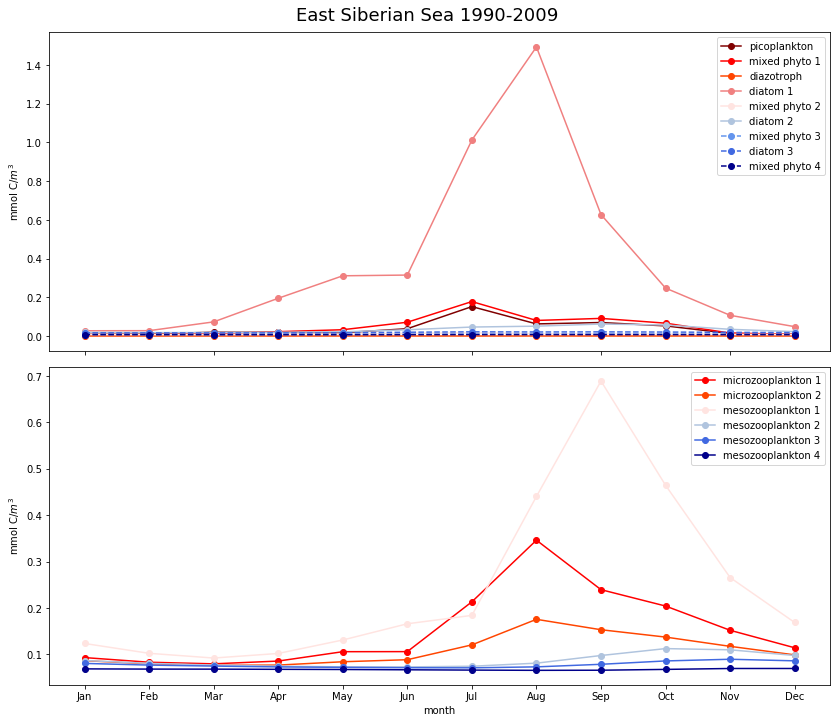

In [18]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('East Siberian Sea 1990-2009',y=0.91,fontsize=18)

axs[0].plot(ppc_ess, '-o', color='maroon', label='picoplankton')
axs[0].plot(mp1c_ess, '-o', color='red',label='mixed phyto 1')
axs[0].plot(diazc_ess, '-o', color='orangered',label='diazotroph')
axs[0].plot(d1c_ess, '-o', color='lightcoral',label='diatom 1')
axs[0].plot(mp2c_ess, '-o', color='mistyrose',label='mixed phyto 2')
axs[0].plot(d2c_ess, '-o', color='lightsteelblue',label='diatom 2')
axs[0].plot(mp3c_ess, '--o', color='cornflowerblue',label='mixed phyto 3')
axs[0].plot(d3c_ess, '--o', color='royalblue',label='diatom 3')
axs[0].plot(mp4c_ess, '--o', color='darkblue',label='mixed phyto 4')
axs[0].legend(loc='upper right')

axs[1].plot(zoo1c_ess, '-o',color='red', label='microzooplankton 1')
axs[1].plot(zoo2c_ess, '-o',color='orangered', label='microzooplankton 2')
axs[1].plot(zoo3c_ess, '-o',color='mistyrose', label='mesozooplankton 1')
axs[1].plot(zoo4c_ess, '-o',color='lightsteelblue', label='mesozooplankton 2')
axs[1].plot(zoo5c_ess, '-o',color='royalblue', label='mesozooplankton 3')
axs[1].plot(zoo6c_ess, '-o',color='darkblue', label='mesozooplankton 4')
axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

for ax in axs.flat:
    ax.set(xlabel='month', ylabel='mmol C/$m^3$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('ess_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

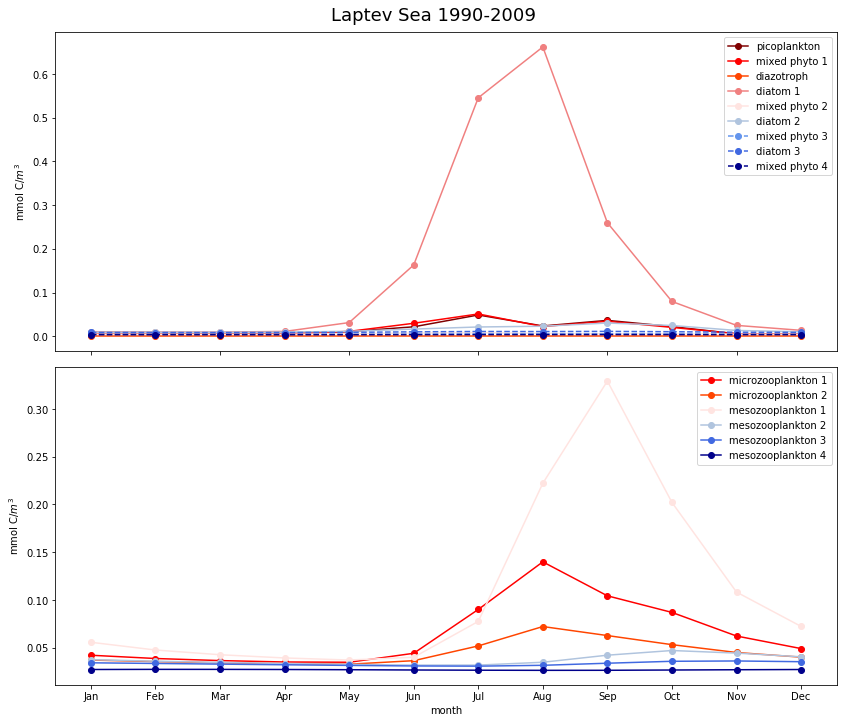

In [19]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Laptev Sea 1990-2009',y=0.91,fontsize=18)

axs[0].plot(ppc_ls, '-o', color='maroon', label='picoplankton')
axs[0].plot(mp1c_ls, '-o', color='red',label='mixed phyto 1')
axs[0].plot(diazc_ls, '-o', color='orangered',label='diazotroph')
axs[0].plot(d1c_ls, '-o', color='lightcoral',label='diatom 1')
axs[0].plot(mp2c_ls, '-o', color='mistyrose',label='mixed phyto 2')
axs[0].plot(d2c_ls, '-o', color='lightsteelblue',label='diatom 2')
axs[0].plot(mp3c_ls, '--o', color='cornflowerblue',label='mixed phyto 3')
axs[0].plot(d3c_ls, '--o', color='royalblue',label='diatom 3')
axs[0].plot(mp4c_ls, '--o', color='darkblue',label='mixed phyto 4')
axs[0].legend(loc='upper right')

axs[1].plot(zoo1c_ls, '-o',color='red', label='microzooplankton 1')
axs[1].plot(zoo2c_ls, '-o',color='orangered', label='microzooplankton 2')
axs[1].plot(zoo3c_ls, '-o',color='mistyrose', label='mesozooplankton 1')
axs[1].plot(zoo4c_ls, '-o',color='lightsteelblue', label='mesozooplankton 2')
axs[1].plot(zoo5c_ls, '-o',color='royalblue', label='mesozooplankton 3')
axs[1].plot(zoo6c_ls, '-o',color='darkblue', label='mesozooplankton 4')
axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

for ax in axs.flat:
    ax.set(xlabel='month', ylabel='mmol C/$m^3$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('ls_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

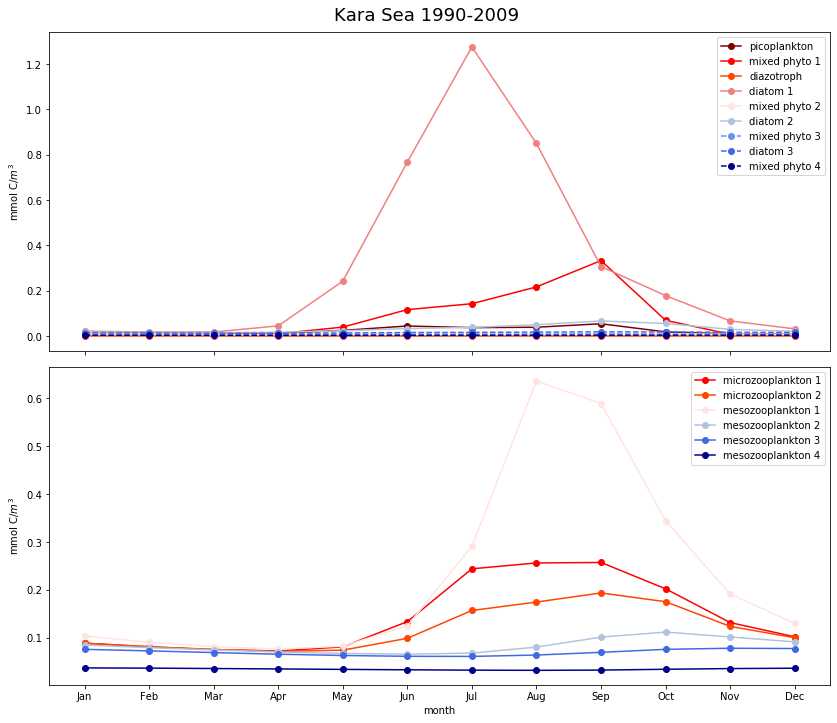

In [20]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Kara Sea 1990-2009',y=0.91,fontsize=18)

axs[0].plot(ppc_ks, '-o', color='maroon', label='picoplankton')
axs[0].plot(mp1c_ks, '-o', color='red',label='mixed phyto 1')
axs[0].plot(diazc_ks, '-o', color='orangered',label='diazotroph')
axs[0].plot(d1c_ks, '-o', color='lightcoral',label='diatom 1')
axs[0].plot(mp2c_ks, '-o', color='mistyrose',label='mixed phyto 2')
axs[0].plot(d2c_ks, '-o', color='lightsteelblue',label='diatom 2')
axs[0].plot(mp3c_ks, '--o', color='cornflowerblue',label='mixed phyto 3')
axs[0].plot(d3c_ks, '--o', color='royalblue',label='diatom 3')
axs[0].plot(mp4c_ks, '--o', color='darkblue',label='mixed phyto 4')
axs[0].legend(loc='upper right')

axs[1].plot(zoo1c_ks, '-o',color='red', label='microzooplankton 1')
axs[1].plot(zoo2c_ks, '-o',color='orangered', label='microzooplankton 2')
axs[1].plot(zoo3c_ks, '-o',color='mistyrose', label='mesozooplankton 1')
axs[1].plot(zoo4c_ks, '-o',color='lightsteelblue', label='mesozooplankton 2')
axs[1].plot(zoo5c_ks, '-o',color='royalblue', label='mesozooplankton 3')
axs[1].plot(zoo6c_ks, '-o',color='darkblue', label='mesozooplankton 4')
axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

for ax in axs.flat:
    ax.set(xlabel='month', ylabel='mmol C/$m^3$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
    
fig.savefig('ks_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

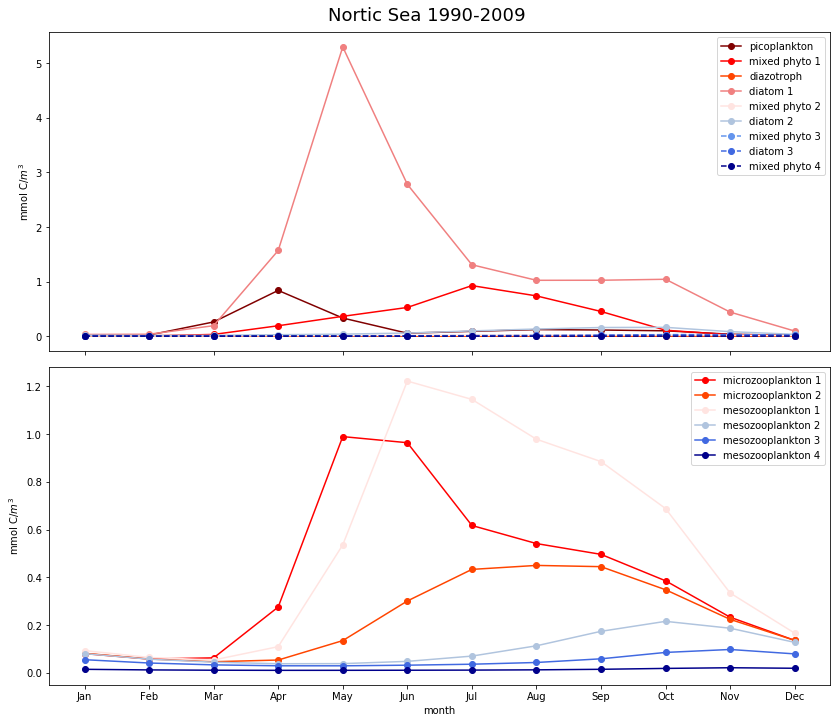

In [25]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Nortic Sea 1990-2009',y=0.91,fontsize=18)

axs[0].plot(ppc_ns, '-o', color='maroon', label='picoplankton')
axs[0].plot(mp1c_ns, '-o', color='red',label='mixed phyto 1')
axs[0].plot(diazc_ns, '-o', color='orangered',label='diazotroph')
axs[0].plot(d1c_ns, '-o', color='lightcoral',label='diatom 1')
axs[0].plot(mp2c_ns, '-o', color='mistyrose',label='mixed phyto 2')
axs[0].plot(d2c_ns, '-o', color='lightsteelblue',label='diatom 2')
axs[0].plot(mp3c_ns, '--o', color='cornflowerblue',label='mixed phyto 3')
axs[0].plot(d3c_ns, '--o', color='royalblue',label='diatom 3')
axs[0].plot(mp4c_ns, '--o', color='darkblue',label='mixed phyto 4')
axs[0].legend(loc='upper right')

axs[1].plot(zoo1c_ns, '-o',color='red', label='microzooplankton 1')
axs[1].plot(zoo2c_ns, '-o',color='orangered', label='microzooplankton 2')
axs[1].plot(zoo3c_ns, '-o',color='mistyrose', label='mesozooplankton 1')
axs[1].plot(zoo4c_ns, '-o',color='lightsteelblue', label='mesozooplankton 2')
axs[1].plot(zoo5c_ns, '-o',color='royalblue', label='mesozooplankton 3')
axs[1].plot(zoo6c_ns, '-o',color='darkblue', label='mesozooplankton 4')
axs[1].legend(loc='upper right')


plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

for ax in axs.flat:
    ax.set(xlabel='month', ylabel='mmol C/$m^3$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('ns_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

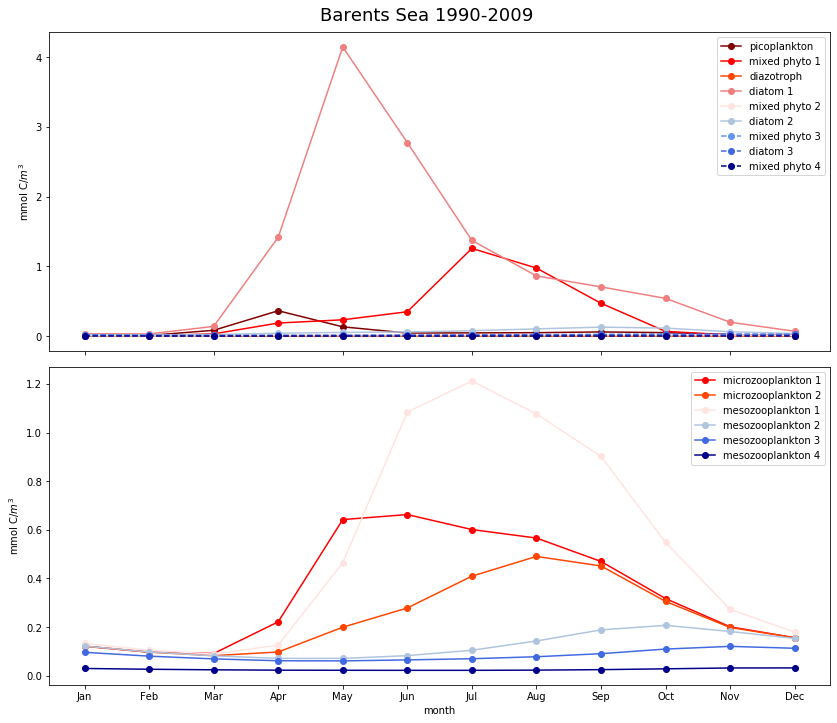

In [22]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Barents Sea 1990-2009',y=0.91,fontsize=18)

axs[0].plot(ppc_bts, '-o', color='maroon', label='picoplankton')
axs[0].plot(mp1c_bts, '-o', color='red',label='mixed phyto 1')
axs[0].plot(diazc_bts, '-o', color='orangered',label='diazotroph')
axs[0].plot(d1c_bts, '-o', color='lightcoral',label='diatom 1')
axs[0].plot(mp2c_bts, '-o', color='mistyrose',label='mixed phyto 2')
axs[0].plot(d2c_bts, '-o', color='lightsteelblue',label='diatom 2')
axs[0].plot(mp3c_bts, '--o', color='cornflowerblue',label='mixed phyto 3')
axs[0].plot(d3c_bts, '--o', color='royalblue',label='diatom 3')
axs[0].plot(mp4c_bts, '--o', color='darkblue',label='mixed phyto 4')
axs[0].legend(loc='upper right')

axs[1].plot(zoo1c_bts, '-o',color='red', label='microzooplankton 1')
axs[1].plot(zoo2c_bts, '-o',color='orangered', label='microzooplankton 2')
axs[1].plot(zoo3c_bts, '-o',color='mistyrose', label='mesozooplankton 1')
axs[1].plot(zoo4c_bts, '-o',color='lightsteelblue', label='mesozooplankton 2')
axs[1].plot(zoo5c_bts, '-o',color='royalblue', label='mesozooplankton 3')
axs[1].plot(zoo6c_bts, '-o',color='darkblue', label='mesozooplankton 4')
axs[1].legend(loc='upper right')


plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

for ax in axs.flat:
    ax.set(xlabel='month', ylabel='mmol C/$m^3$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('bts_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')

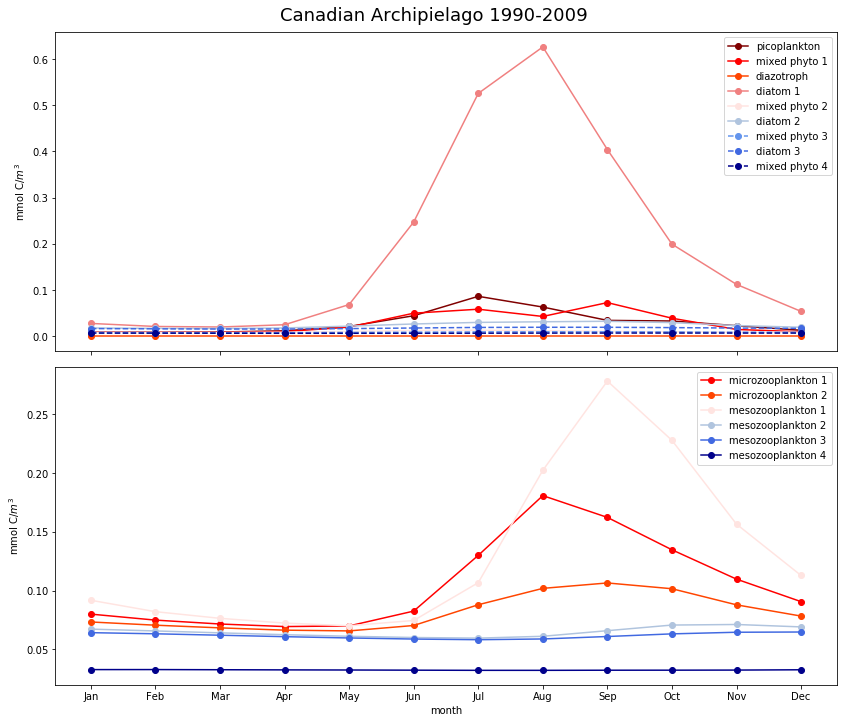

In [23]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Canadian Archipielago 1990-2009',y=0.91,fontsize=18)

axs[0].plot(ppc_ca, '-o', color='maroon', label='picoplankton')
axs[0].plot(mp1c_ca, '-o', color='red',label='mixed phyto 1')
axs[0].plot(diazc_ca, '-o', color='orangered',label='diazotroph')
axs[0].plot(d1c_ca, '-o', color='lightcoral',label='diatom 1')
axs[0].plot(mp2c_ca, '-o', color='mistyrose',label='mixed phyto 2')
axs[0].plot(d2c_ca, '-o', color='lightsteelblue',label='diatom 2')
axs[0].plot(mp3c_ca, '--o', color='cornflowerblue',label='mixed phyto 3')
axs[0].plot(d3c_ca, '--o', color='royalblue',label='diatom 3')
axs[0].plot(mp4c_ca, '--o', color='darkblue',label='mixed phyto 4')
axs[0].legend(loc='upper right')

axs[1].plot(zoo1c_ca, '-o',color='red', label='microzooplankton 1')
axs[1].plot(zoo2c_ca, '-o',color='orangered', label='microzooplankton 2')
axs[1].plot(zoo3c_ca, '-o',color='mistyrose', label='mesozooplankton 1')
axs[1].plot(zoo4c_ca, '-o',color='lightsteelblue', label='mesozooplankton 2')
axs[1].plot(zoo5c_ca, '-o',color='royalblue', label='mesozooplankton 3')
axs[1].plot(zoo6c_ca, '-o',color='darkblue', label='mesozooplankton 4')
axs[1].legend(loc='upper right')


plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

for ax in axs.flat:
    ax.set(xlabel='month', ylabel='mmol C/$m^3$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('ca_clim_zoo&phyto.png', dpi=300, bbox_inches='tight')